In [ ]:
import random
import math

#指数分布に従う
def gen_exp(lam):
  u = random.random()
  x = -1/lam * math.log(u)
  return x

#一様分布に従う
def gen_uni(a,b):
   u = random.random()
   x = b - (b-a) * u
   return x 

#パレート分布に従う
def gen_par(alpha,xm):
  u = random.random()
  x = xm / u ** (1/alpha)
  return x  

#mmssのロス率を取得
def mmss(S, mu, lam, end_time, kind):
  
  t_a = 0.0  
  t_d = [0.0] * S 

  n_c = 0 #到着したお客さんの数
  n_l = 0 #ロスしたお客さんの数 
  
  b_uni = 0.5
  a_uni = 2/mu - b_uni

  alpha = 3 #alpha>1
  xm = (alpha - 1)/(mu * alpha)

  while t_a < end_time:
    #2.1 お客さんの発生を行う
    t_a = t_a + gen_exp(lam)
    n_c += 1

    #2.2客の受付処理
    for s in range(S):
      if t_d[s]<t_a:
        if kind == "exp":
          t_d[s] = t_a + gen_exp(mu) 
        
        elif kind == "single":
          t_d[s] = t_a + 1/mu 
        
        elif kind == "uni":  
          t_d[s] = t_a + gen_uni(a_uni,b_uni)

        elif kind == "par":  
          t_d[s] = t_a + gen_par(alpha,xm)
        
        break 
     
    else:
      n_l += 1

  return n_l/n_c

#標本平均
def average(a_max, data_s):
  data_sum = 0
  for a in range(a_max):
    data_sum += data_s[a] 
  return data_sum/a_max

#不偏分散
def UnbiasedDispersion(data_ave, data_s,a_max):
  data_dis = 0
  for a in range(a_max):
    data_dis += (data_s[a]-data_ave)**2 
  return data_dis/(a_max-1) 

S = 5 #サーバーの台数
mu = 1
a_max = 50 #シミュレーションの実行回数
data_s = [0.0] * a_max

kind = 'exp'

#シミュレーション時間をn回を変化させ,lamを3回変化させる
n = 3
end_time = [100,500,1000]
lam = [3,10,50]
len = [0.0] * n

for h in range(n):
  print("---------lam = %d-------------"%lam[h])
  for i in range(n):
    print("end_time = %d"%end_time[i])
    for j in range(a_max):
      data_s[j] = mmss(S, mu, lam[h], end_time[i], kind)

    data_ave = average(a_max, data_s)
    print("平均ロス率は%f"%data_ave)

    data_ud = UnbiasedDispersion(data_ave, data_s, a_max)

    #95%信頼区間(自由度9)
    up = data_ave + 2.262 * (data_ud ** 1/2)/(a_max ** 1/2)
    bottom = data_ave - 2.262 * (data_ud ** 1/2)/(a_max ** 1/2)
    print(up,bottom)
    len[i] = up - bottom#信頼区間の大きさ
    print("信頼区間はの大きさは%f\n"%len[i])

  


---------lam = 3-------------
end_time = 100
平均ロス率は0.105019
0.10504753016386605 0.10499031119937376
信頼区間はの大きさは0.000057

end_time = 500
平均ロス率は0.108009
0.10801409173029765 0.10800314614080515
信頼区間はの大きさは0.000011

end_time = 1000
平均ロス率は0.109109
0.10911152345426889 0.10910611048997843
信頼区間はの大きさは0.000005

---------lam = 10-------------
end_time = 100
平均ロス率は0.563570
0.5635884639478014 0.5635519065855724
信頼区間はの大きさは0.000037

end_time = 500
平均ロス率は0.564243
0.5642472791985228 0.5642391070676992
信頼区間はの大きさは0.000008

end_time = 1000
平均ロス率は0.563592
0.5635938909431591 0.5635898610716753
信頼区間はの大きさは0.000004

---------lam = 50-------------
end_time = 100
平均ロス率は0.901539
0.9015402935477543 0.901538360832741
信頼区間はの大きさは0.000002

end_time = 500
平均ロス率は0.902038
0.9020385908114933 0.9020381430728633
信頼区間はの大きさは0.000000

end_time = 1000
平均ロス率は0.902310
0.9023102923988419 0.9023101252876221
信頼区間はの大きさは0.000000



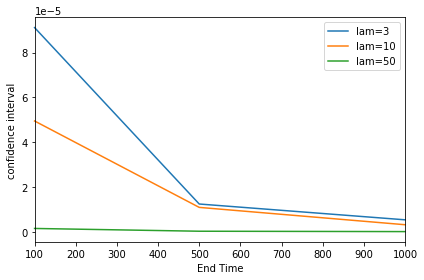

In [ ]:
import matplotlib.pyplot as plt
import math
from google.colab import files

#end_timeが変化するごとにそれぞれの平均値と信頼区間をエラーバーでプロットしたい

# 描画
n_r = 1    # 行数
n_c = 1    # 列数
fig,axes = plt.subplots(n_r, n_c, tight_layout = True)    # figure オブジェクトの取得

for h in range(n):
  for i in range(n):
    for j in range(a_max):
      data_s[j] = mmss(S, mu, lam[h], end_time[i], kind)

    data_ave = average(a_max, data_s)
    data_ud = UnbiasedDispersion(data_ave, data_s, a_max)

    #95%信頼区間(自由度9)
    up = data_ave + 2.262 * (data_ud ** 1/2)/(a_max ** 1/2)
    bottom = data_ave - 2.262 * (data_ud ** 1/2)/(a_max ** 1/2)
    len[i] = up - bottom#信頼区間の大きさ

  axes.plot(end_time, len, '-',  label = "lam=%d"%lam[h] , clip_on=False)

axes.legend()                 #  注釈の作成

axes.set_xlim(end_time[0], end_time[n-1])   #   x 軸の範囲を指定

axes.set_ylabel('confidence interval')  # y 軸のラベルを描画
axes.set_xlabel('End Time')        #   x 軸のラベルを描画
#axes.set_xscale('log')        #   x 軸を対数目盛に変更
#axes.set_yscale('log')        #   y 軸を対数目盛に変更

## グラフの保存
fig.savefig("poisson.png") 